<a href="https://colab.research.google.com/github/MIHIR2006/Health-care-ML/blob/main/Lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns

Initial DataFrame shape: (3000, 16)
Columns in DataFrame: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Missing values after filling:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRES

<ipython-input-10-3e8a8974ca68>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill if needed


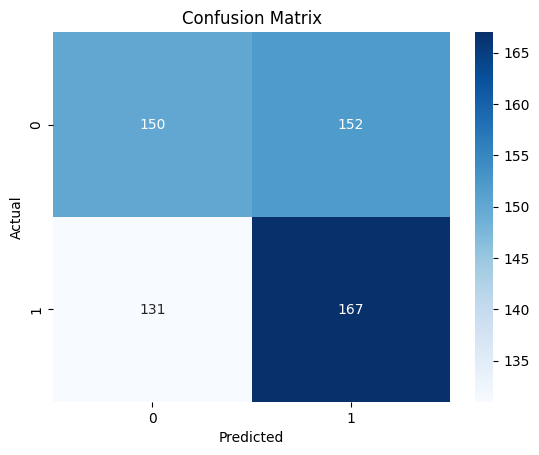

In [10]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung cancer.csv')

# Check the initial state of the DataFrame
print("Initial DataFrame shape:", data.shape)
print("Columns in DataFrame:", data.columns)

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Fill missing values if any
data.fillna(method='ffill', inplace=True)  # Forward fill if needed

# Verify the fill operation
print("\nMissing values after filling:\n", data.isnull().sum())

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # M=1, F=0
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # YES=1, NO=0

# Check the processed DataFrame
print("\nProcessed DataFrame:\n", data.head())

# Split the dataset into features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training (example with K-Nearest Neighbors)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Columns in X_train: Index(['AGE', 'YELLOW_FINGERS'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


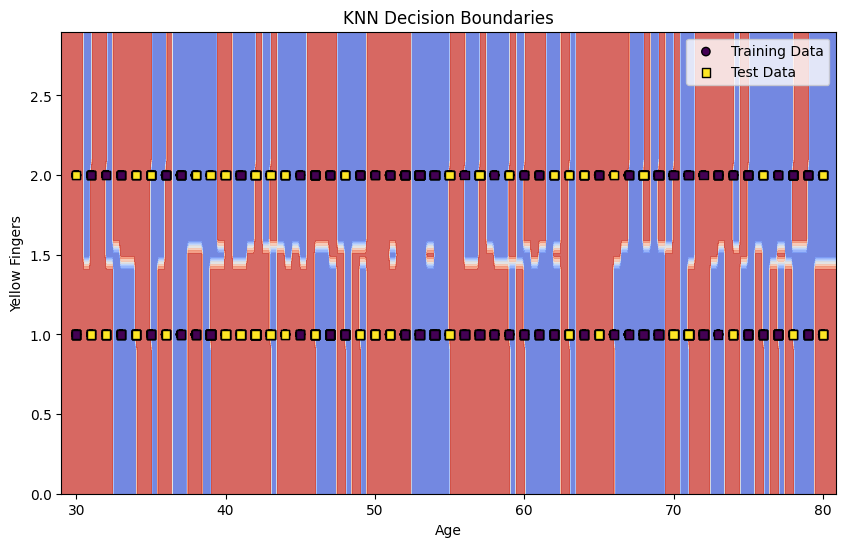

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming you've already loaded your data into 'data'
# and processed it (e.g., filled missing values, label encoding, etc.)

# Select features for visualization
X = data[['AGE', 'YELLOW_FINGERS']]
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the structure of X_train
print("Columns in X_train:", X_train.columns)

# Create and train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)  # Use X_train directly since it contains the features

# Create a mesh grid for the decision boundary
h = .1  # Step size in the mesh
x_min, x_max = X['AGE'].min() - 1, X['AGE'].max() + 1
y_min, y_max = X['YELLOW_FINGERS'].min() - 1, X['YELLOW_FINGERS'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train['AGE'], X_train['YELLOW_FINGERS'], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test['AGE'], X_test['YELLOW_FINGERS'], c=y_test, edgecolors='k', marker='s', label='Test Data')
plt.title('KNN Decision Boundaries')
plt.xlabel('Age')
plt.ylabel('Yellow Fingers')
plt.legend()
plt.show()


Initial DataFrame shape: (3000, 16)
Columns in DataFrame: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Missing values after filling:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRES

<ipython-input-13-9c30e41eac3c>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill if needed



Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51       302
           1       0.52      0.56      0.54       298

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600

Confusion Matrix:
 [[150 152]
 [131 167]]


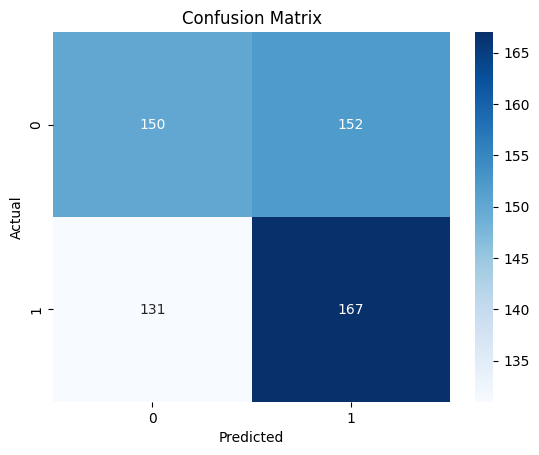

In [13]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung cancer.csv')

# Check the initial state of the DataFrame
print("Initial DataFrame shape:", data.shape)
print("Columns in DataFrame:", data.columns)

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Fill missing values if any
data.fillna(method='ffill', inplace=True)  # Forward fill if needed

# Verify the fill operation
print("\nMissing values after filling:\n", data.isnull().sum())

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # M=1, F=0
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # YES=1, NO=0

# Check the processed DataFrame
print("\nProcessed DataFrame:\n", data.head())

# Split the dataset into features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training (example with K-Nearest Neighbors)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Initial DataFrame shape: (3000, 16)
Columns in DataFrame: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Missing values after filling:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRES

<ipython-input-14-6f361d09d65c>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill if needed


Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47       302
           1       0.47      0.49      0.48       298

    accuracy                           0.47       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.48      0.47      0.47       600

Confusion Matrix:
 [[140 162]
 [153 145]]


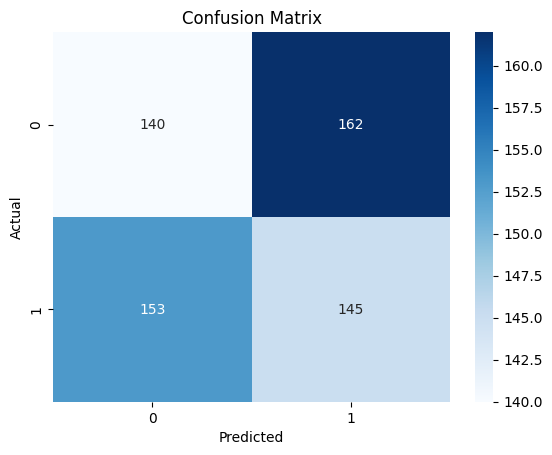

In [14]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung cancer.csv')

# Check the initial state of the DataFrame
print("Initial DataFrame shape:", data.shape)
print("Columns in DataFrame:", data.columns)

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Fill missing values if any
data.fillna(method='ffill', inplace=True)  # Forward fill if needed

# Verify the fill operation
print("\nMissing values after filling:\n", data.isnull().sum())

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # M=1, F=0
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # YES=1, NO=0

# Check the processed DataFrame
print("\nProcessed DataFrame:\n", data.head())

# Split the dataset into features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training with Random Forest
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Fit the model

# Predictions and evaluation
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
